In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [13]:
user = 'root'
password = 'your_password'
database = 'stockdb'
port = 3306
host = 'localhost'

In [2]:
sql = """
SELECT RANK_DATA.STK_CD, RANK_DATA.SEC_NM, RANK_DATA.총이익, RANK_DATA.RANK_총이익
FROM
(
SELECT S.STK_CD,  S.SEC_NM, P.총이익, RANK() OVER(PARTITION BY S.SEC_NM ORDER BY P.총이익 DESC) RANK_총이익
FROM
stock S
INNER JOIN
(
SELECT A.STK_CD, A.당기순이익, B.영업이익, (A.당기순이익+B.영업이익) AS `총이익`
FROM
	(SELECT STK_CD, FIN_ITM_VAL `당기순이익`
	FROM finance_y
	WHERE FIN_ITM_NM = "당기순이익" AND YY = "2018") A
	INNER JOIN
	(SELECT STK_CD, FIN_ITM_VAL `영업이익`
	FROM finance_y
	WHERE FIN_ITM_NM = "영업이익" AND YY = "2018") B USING(STK_CD)
) P USING(STK_CD)
) RANK_DATA
INNER JOIN
(
SELECT SEC_G1.SEC_NM SEC_NM, IF(SEC_G1.SEC_COUNT > 5, 5, SEC_G1.SEC_COUNT) SEC_NUM
FROM
(SELECT SEC_NM, COUNT(*) AS SEC_COUNT
FROM stock
WHERE LENGTH(SEC_NM) > 1
GROUP BY SEC_NM) SEC_G1
) SEC_G2 USING(SEC_NM)
WHERE RANK_DATA.RANK_총이익 <= SEC_G2.SEC_NUM
"""

In [57]:
sql = """
SELECT T1.STK_CD, T1.DT, T1.C_PRC
FROM HISTORY_DT T1
WHERE T1.STK_CD = '005930'
AND T1.DT >= '2019-01-01'
AND T1.DT <= '2020-03-19'
"""

In [58]:
import pymysql

con = pymysql.connect(host=host, user=user, password=password, port=port, db=database, charset='utf8')
cur = con.cursor()

In [59]:
cur.execute(sql)
result = cur.fetchall()

In [60]:
df = pd.DataFrame(result)

In [61]:
desc = cur.description
column_name = list(zip(*desc))[0]
columns = [re.sub("\S*\.","",element) for element in column_name]
df.columns = columns

In [62]:
df

,STK_CD,DT,C_PRC
0,005930,2019-01-02,38750.000
1,005930,2019-01-03,37600.000
2,005930,2019-01-04,37450.000
3,005930,2019-01-07,38750.000
4,005930,2019-01-08,38100.000
...,...,...,...
295,005930,2020-03-13,49950.000
296,005930,2020-03-16,48900.000
297,005930,2020-03-17,47300.000
298,005930,2020-03-18,45600.000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STK_CD  300 non-null    object
 1   DT      300 non-null    object
 2   C_PRC   300 non-null    object
dtypes: object(3)
memory usage: 7.2+ KB


In [64]:
# DT 칼럼의 타입을 날짜와 시간으로 변환
df["DT"] = pd.to_datetime(df["DT"])
df["C_PRC"] = df["C_PRC"].astype("int64")

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   STK_CD  300 non-null    object        
 1   DT      300 non-null    datetime64[ns]
 2   C_PRC   300 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 7.2+ KB


In [66]:
# 종가의 기술 통계 값
print(df["C_PRC"].describe())

count      300.000000
mean     48486.666667
std       5607.064246
min      37450.000000
25%      44437.500000
50%      46650.000000
75%      51800.000000
max      62400.000000
Name: C_PRC, dtype: float64


In [67]:
# 종가의 분산
print(df["C_PRC"].var())

31439169.453734674


In [68]:
# 종가의 표준편차
np.sqrt(df["C_PRC"].var())

5607.064245550846

In [69]:
# 종가의 표준편차
df["C_PRC"].std()

5607.064245550846

In [70]:
# 20일 종가 이동 평균과 표준 편차
df["MA20"] = df["C_PRC"].rolling(20).mean()
df["stddev"] = df["C_PRC"].rolling(20).std()

In [71]:
df.head(50)

,STK_CD,DT,C_PRC,MA20,stddev
0,005930,2019-01-02,38750,NaN,NaN
1,005930,2019-01-03,37600,NaN,NaN
2,005930,2019-01-04,37450,NaN,NaN
3,005930,2019-01-07,38750,NaN,NaN
4,005930,2019-01-08,38100,NaN,NaN
5,005930,2019-01-09,39600,NaN,NaN
6,005930,2019-01-10,39800,NaN,NaN
7,005930,2019-01-11,40500,NaN,NaN
8,005930,2019-01-14,40050,NaN,NaN
9,005930,2019-01-15,41100,NaN,NaN


In [72]:
# 상위 밴드
# UpperB = 종가의 이동평균 + (표준편차 * 2)
df["UpperB"] = df["MA20"] + (df["stddev"] * 2)
# 하위 밴드
# LowerB = 종가의 이동평균 - (표준편차 * 2)
df["LowerB"] = df["MA20"] - (df["stddev"] * 2)

In [73]:
df

,STK_CD,DT,C_PRC,MA20,stddev,UpperB,LowerB
0,005930,2019-01-02,38750,NaN,NaN,NaN,NaN
1,005930,2019-01-03,37600,NaN,NaN,NaN,NaN
2,005930,2019-01-04,37450,NaN,NaN,NaN,NaN
3,005930,2019-01-07,38750,NaN,NaN,NaN,NaN
4,005930,2019-01-08,38100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
295,005930,2020-03-13,49950,56287.5,3124.852628,62537.205256,50037.794744
296,005930,2020-03-16,48900,55657.5,3284.704385,62226.908769,49088.091231
297,005930,2020-03-17,47300,55032.5,3626.447987,62285.395973,47779.604027
298,005930,2020-03-18,45600,54302.5,3983.402242,62269.304484,46335.695516


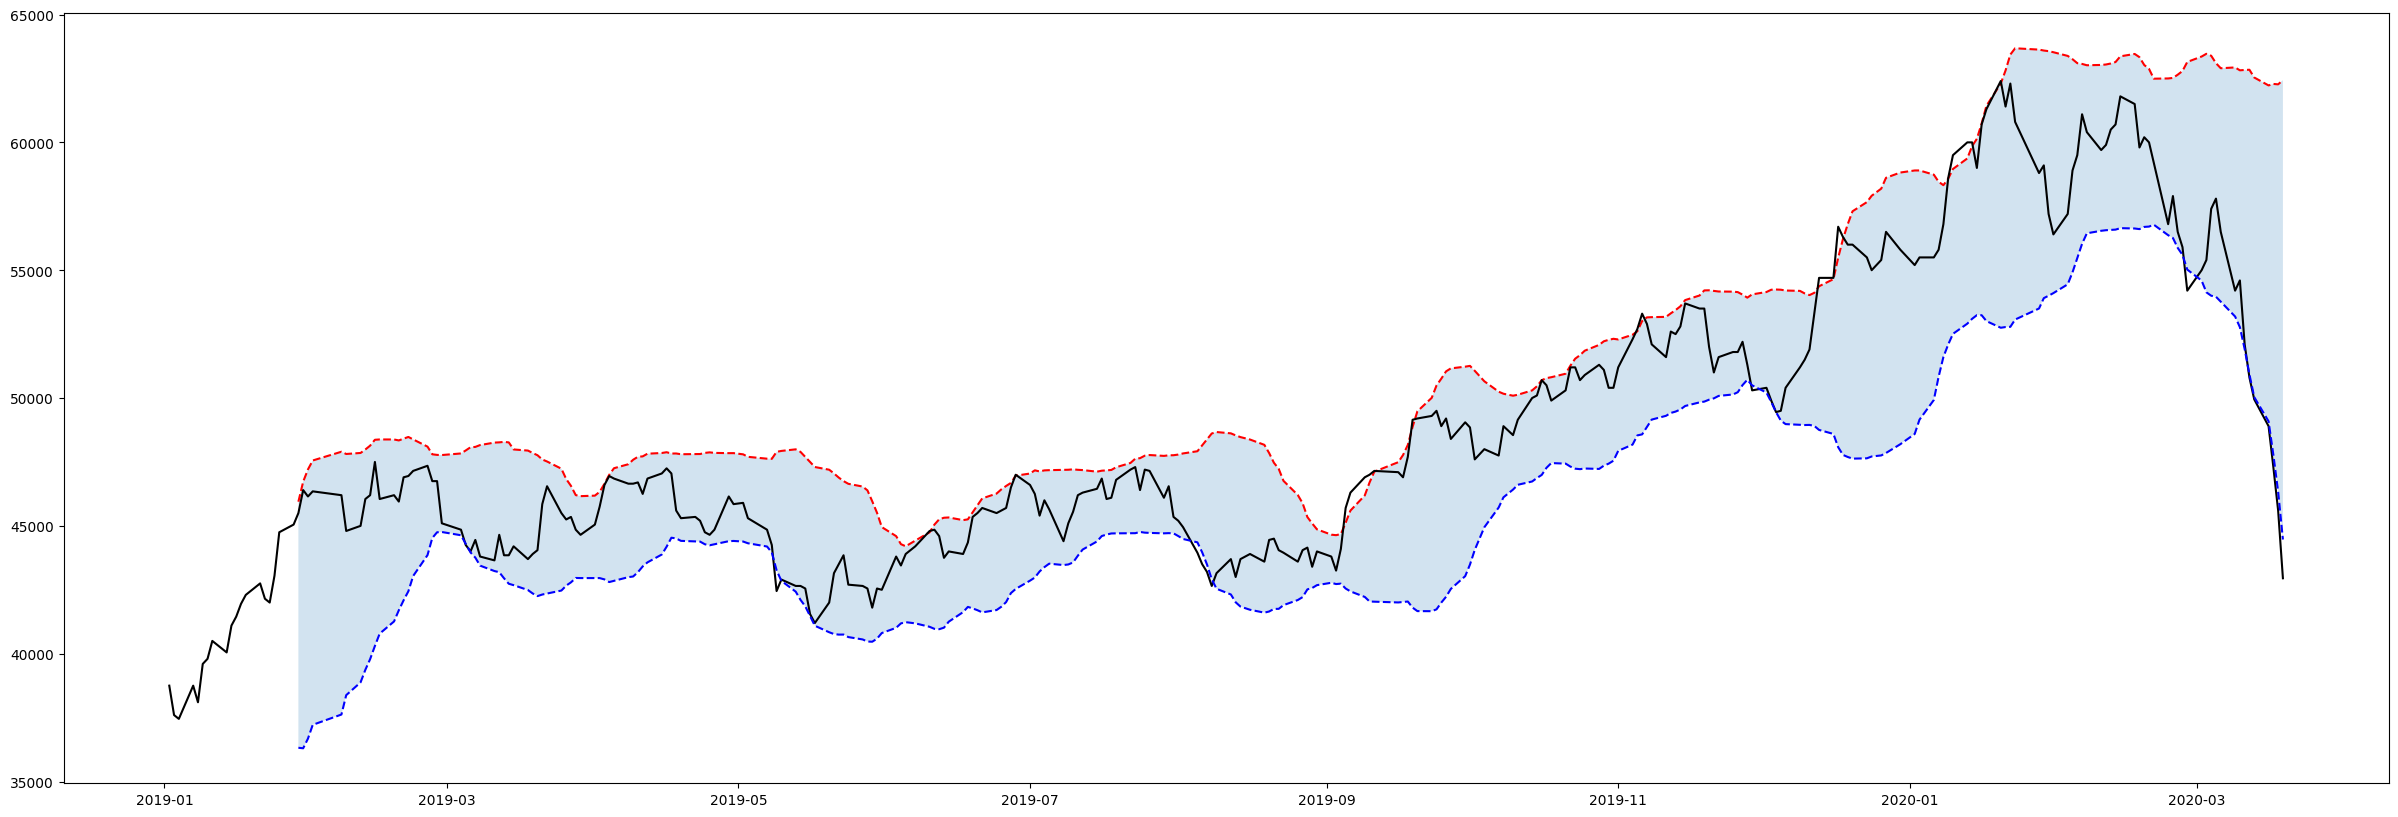

In [74]:
plt.figure(figsize=(30, 10))
plt.plot(df["DT"], df["UpperB"], "r--")
plt.plot(df["DT"], df["C_PRC"], "k")
plt.plot(df["DT"], df["LowerB"], "b--")
plt.fill_between(df["DT"], df["LowerB"], df["UpperB"], alpha=0.2)